In [1]:
from transformers import AutoImageProcessor, DPTForDepthEstimation
from src.models import DPTMultiviewDepth
import torch
import numpy as np
from PIL import Image
import requests

In [2]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

In [3]:
image_processor = AutoImageProcessor.from_pretrained("Intel/dpt-large")
model = DPTMultiviewDepth.from_pretrained("Intel/dpt-large")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of DPTMultiviewDepth were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'knowledge_sources.13', 'knowledge_sources.16', 'knowledge_sources.22', 'knowledge_sources.8', 'knowledge_sources.17', 'knowledge_sources.2', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'knowledge_sources.7', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'knowledge_sources.10', 'knowledge_sources.0', 'knowledge_sources.12', 'knowledge_sources.5', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'knowledge_sources.15', 'knowledge_sources.11', 'knowledge_sources.9', 'knowledge_sources.18', 'knowledge_sources.14', 'knowledge_sources.3', 'knowledge_sources.19', 'knowledge_sour

In [4]:
# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

In [5]:
inputs['pixel_values'].shape

torch.Size([1, 3, 384, 384])

In [6]:
with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs["predicted_depth"]

In [7]:
# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

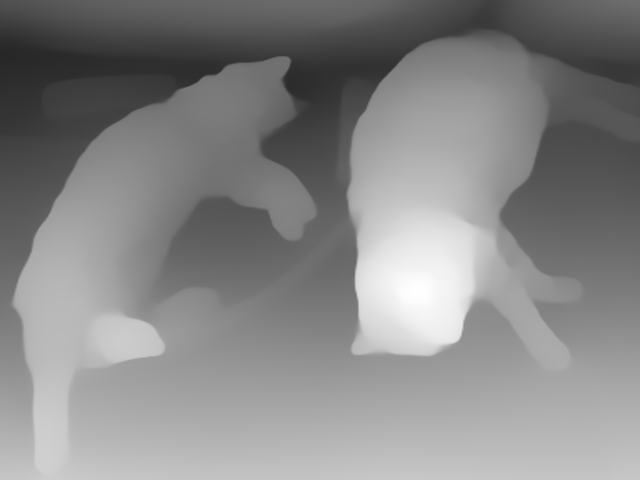

In [8]:
depth

NameError: name 'Image' is not defined